#0. Librerias

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

#1. Carga de datos

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alanzapatasilva","key":"f6d7fdc4da9c2335cb2751bb019eb6b5"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d parulpandey/forbes-highest-paid-athletes-19902019
!mkdir /content/data/
!mkdir /content/data/forbes
!unzip /content/forbes-highest-paid-athletes-19902019.zip -d /content/data/forbes/

  0% 0.00/4.26k [00:00<?, ?B/s]
100% 4.26k/4.26k [00:00<00:00, 8.15MB/s]
Archive:  /content/forbes-highest-paid-athletes-19902019.zip
  inflating: /content/data/forbes/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv  


In [5]:
df_forbes = pd.read_csv("/content/data/forbes/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv")

In [6]:
df_forbes

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


#2. Identifiación de tipos de datos de cada variables

Tipos de variables en el dataset:

*   **S.NO** : Numerica discreta
*   **Name** : Categorica nominal
*   **Nationality** : Categorica nominal
*   **Current Rank** : Numerica discreta
*   **Previous Year Rank** : Numerica discreta
*   **Sport** : Categorica nominal
*   **Year** : Numerica discreta
*   **earnings** (*$ million*) : Numerica continua

#3. Estadisticas para variables

## Variables tipo numericas

In [7]:
df_forbes.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


En el dataFrame mostrado arriba, las abreviaciones de los titulos de las filas significan:
- **count**: Cantidad de registros
- **mean**: Media aritmetica
- **std**: Desviación estandar
- **min**: Menor valor que toma la variable
- **25%**: Primer cuartil
- **50%**: Mediana/Segundo cuartil
- **75%**: Tercer cuartil
- **max**: Maximo valor que toma la variable

## Variables tipo categoricas

A continuacion se presenta el estudio de las variables categoricas, en donde se encuentran las cifras de frecuencia absoluta y relativa de cada variable, haciendo enfasis en la moda en la variable en estudio.

###a) Name

In [8]:
print("Variable Name:")
variableStats= df_forbes["Name"].value_counts().to_frame(name='Frecuencia Absoluta')
variableStats['Frecuencia Relativa']= df_forbes["Name"].value_counts(normalize=True)
print(variableStats)

Variable Name:
                    Frecuencia Absoluta  Frecuencia Relativa
Tiger Woods                          19             0.063123
Michael Jordan                       19             0.063123
Kobe Bryant                          14             0.046512
LeBron James                         13             0.043189
Michael Schumacher                   13             0.043189
...                                 ...                  ...
Tom Brady                             1             0.003322
Michael Moorer                        1             0.003322
Dale Earnhardt Jr.                    1             0.003322
Greg Norman                           1             0.003322
Carson Wentz                          1             0.003322

[82 rows x 2 columns]


Se puede notar que los atletas mas repetidos (moda) son Tiger Woods y Michael Jordan, reforzandolo con:

In [9]:
print("Moda:\n%s" % df_forbes["Name"].mode())

Moda:
0    Michael Jordan
1       Tiger Woods
Name: Name, dtype: object


###b) Nationality

In [10]:
print("Variable Nationality:")
variableStats= df_forbes["Nationality"].value_counts().to_frame(name='Frecuencia Absoluta')
variableStats['Frecuencia Relativa']= df_forbes["Nationality"].value_counts(normalize=True)
print(variableStats)

Variable Nationality:
                  Frecuencia Absoluta  Frecuencia Relativa
USA                               206             0.684385
UK                                 13             0.043189
Germany                            13             0.043189
Switzerland                        12             0.039867
Portugal                           10             0.033223
Brazil                              9             0.029900
Argentina                           9             0.029900
Canada                              6             0.019934
Italy                               4             0.013289
Finland                             3             0.009967
France                              3             0.009967
Philippines                         3             0.009967
Russia                              1             0.003322
Australia                           1             0.003322
Dominican                           1             0.003322
Austria                           

Se puede rescatar que en el ranking el pais moda es USA, confirmandolo con:

In [11]:
print("Moda:\n%s" % df_forbes["Nationality"].mode())

Moda:
0    USA
Name: Nationality, dtype: object


###c) Sport

In [12]:
print("Variable Nationality:")
variableStats= df_forbes["Sport"].value_counts().to_frame(name='Frecuencia Absoluta')
variableStats['Frecuencia Relativa']= df_forbes["Sport"].value_counts(normalize=True)
print(variableStats)

Variable Nationality:
                              Frecuencia Absoluta  Frecuencia Relativa
Basketball                                     54             0.179402
Boxing                                         29             0.096346
basketball                                     27             0.089701
Golf                                           24             0.079734
Soccer                                         22             0.073090
golf                                           20             0.066445
Tennis                                         18             0.059801
boxing                                         17             0.056478
American Football                              17             0.056478
soccer                                         11             0.036545
Auto Racing                                    10             0.033223
F1 racing                                       8             0.026578
auto racing                                     7      

Se puede rescatar que en el ranking el deporte moda es el basketball, confirmandolo con:

In [13]:
print("Moda:\n%s" % df_forbes["Sport"].mode())

Moda:
0    Basketball
Name: Sport, dtype: object


#4. Graficos

##a) Gráfico de dispersion Pais v/s Deporte, de los #1

In [22]:
df_forbes["Sport"]=df_forbes["Sport"].str.lower()
df_firstPlace=df_forbes[df_forbes['Current Rank'] == 1]

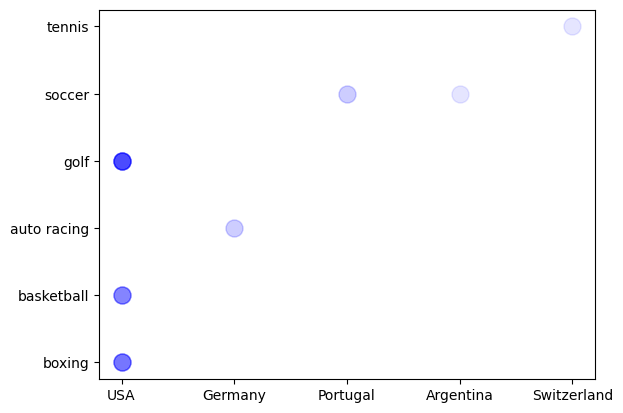

In [23]:
x = df_firstPlace["Nationality"]
y = df_firstPlace["Sport"]

plt.scatter(x, y, color='blue', alpha=0.1, s=150)
plt.show()

A partir del grafico anterior se puede notar que los deportistas que han ocupado el primer lugar del ranking, se han mantenido dentro de 6 deportes, mientras que sus nacionalidades varian entre 5, manteniendo un claro dominio por parte de USA, donde el deporte que mas 1eros lugares ha entregado, es el golf.

##b) Variación por años de la suma de los suelos de los ateltas en el top del ranking

In [17]:
df_agrupado = df_forbes.groupby('Year')['earnings ($ million)'].sum().reset_index()

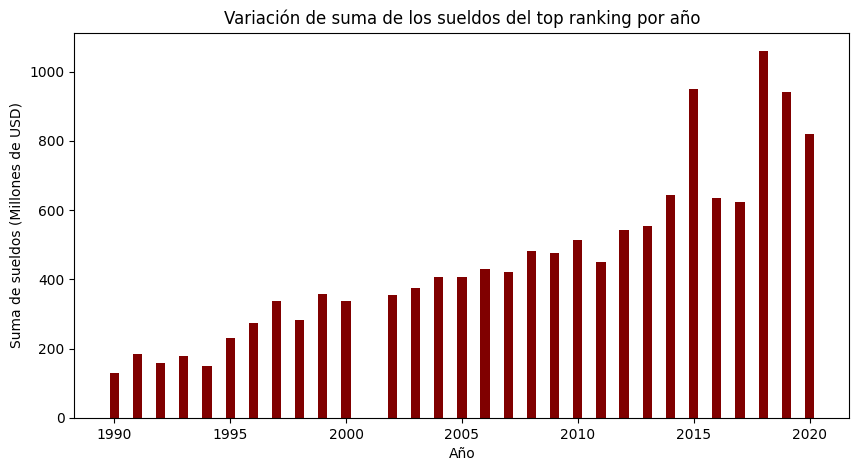

In [18]:
fig = plt.figure(figsize = (10, 5))

plt.bar(df_agrupado['Year'], df_agrupado['earnings ($ million)'], color ='maroon',
        width = 0.4)

plt.xlabel("Año")
plt.ylabel("Suma de sueldos (Millones de USD)")
plt.title("Variación de suma de los sueldos del top ranking por año")
plt.show()

El grafico anterior muestra como se presenta una tendencia en los montos que se le pagan a los atletas mejor pagados, presentando explosivos aumentos en 2015 y 2018.

##c) Ingresos por deporte

In [19]:
df_porDeporte = df_forbes.groupby('Sport')['earnings ($ million)'].sum().reset_index()
df_porDeporte

,Sport,earnings ($ million)
0,american football,901.2
1,american football / baseball,22.5
2,auto racing,386.3
3,auto racing (nascar),44.5
4,baseball,146.1
5,basketball,3418.1
6,boxing,2298.8
7,cycling,28.0
8,f1 motorsports,248.0
9,f1 racing,397.0


In [1]:
fig = px.treemap(df_porDeporte, path=['Sport'], values='earnings ($ million)',
                  color='earnings ($ million)', hover_data=['Sport'],
                  color_continuous_scale='RdBu')

# Añadir título
fig.update_layout(title_text="Suma de ingresos, por deporte")

# Añadir leyenda
fig.update_layout(legend_title="Ingresos")
fig.show()

NameError: ignored

El gráfico presente permite dimensionar cuales son los deportes que mayor cantidad de dinero ha desembolsando en estos deportistas.

##d) Distribucion paga en los deportes

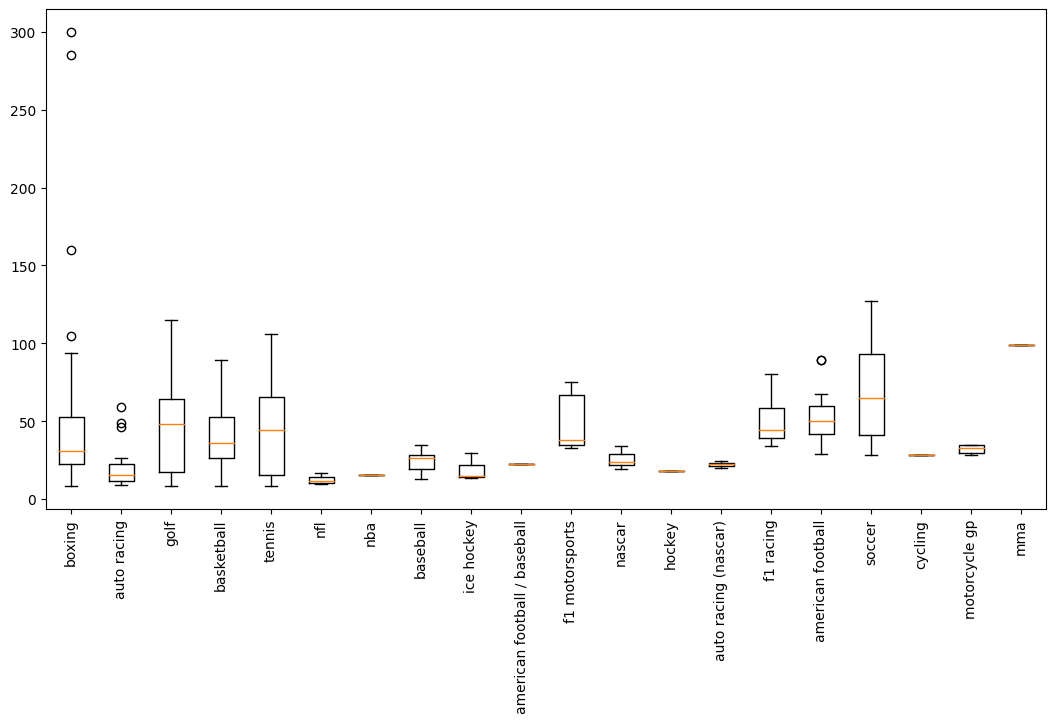

In [21]:
sports= ['boxing', 'auto racing', 'golf', 'basketball', 'tennis', 'nfl',
       'nba', 'baseball', 'ice hockey', 'american football / baseball',
       'f1 motorsports', 'nascar', 'hockey', 'auto racing (nascar)',
       'f1 racing', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma']

data =[]
for sport in sports:
  # Filtrar el DataFrame por el deporte en específico
  df_filtrado = df_forbes[df_forbes['Sport'] == sport]

  # Obtener la columna 'Costo' como una lista
  costos = df_filtrado['earnings ($ million)'].tolist()
  data.append(costos)

fig = plt.figure(figsize =(10, 5))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# Cambiar las etiquetas del eje X
plt.xticks(range(1, len(sports) + 1), sports, rotation='vertical')
# show plot
plt.show()

Aca se puede notar que hay deportes con altos pagos maximos por año como el boxeo, el cual, sin embargo, tambien alcanza los valores mas bajo en este dataset, lo cual se puede inferir basado en la antiguedad del deporte como espectaculo a diferencia de la mayoria de los otros deportes en el dataset. No pasa lo mismo que en el punto anterior en el mma, donde no varia mucho los mejores pagados, pero el monto siempre es relativamente alto.

#5. Categorización de variable *earnings*

Primero, se categorizó la columna solicitada:

In [29]:
rango=(300-8.1)/10 #Se separaron segun deciles del rango completo de salarios que han tenido los rankings
bins = [8.1, rango+8.1, 2*rango+8.1, 3*rango+8.1, 4*rango+8.1, 5*rango+8.1, 6*rango+8.1, 7*rango+8.1, 8*rango+8.1, 9*rango+8.1, 10*rango+8.1]

nombres_categorias = ['1° level', '2° level', '3° level', '4° level', '5° level', '6° level', '7° level', '8° level', '9° level', '10° level']

df_forbes['Sallary based levels'] = pd.cut(df_forbes['earnings ($ million)'], bins, labels=nombres_categorias)
df_forbes[df_forbes['Sallary based levels']=="10° level"]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),Sallary based levels
241,242,Floyd Mayweather,USA,1,1,boxing,2015,300.0,10° level
271,272,Floyd Mayweather,USA,1,>100,boxing,2018,285.0,10° level


In [ ]:
Luego, se presenta un grafico el cual representa la cantidad de deportistas que pertenecen a cada nivel:

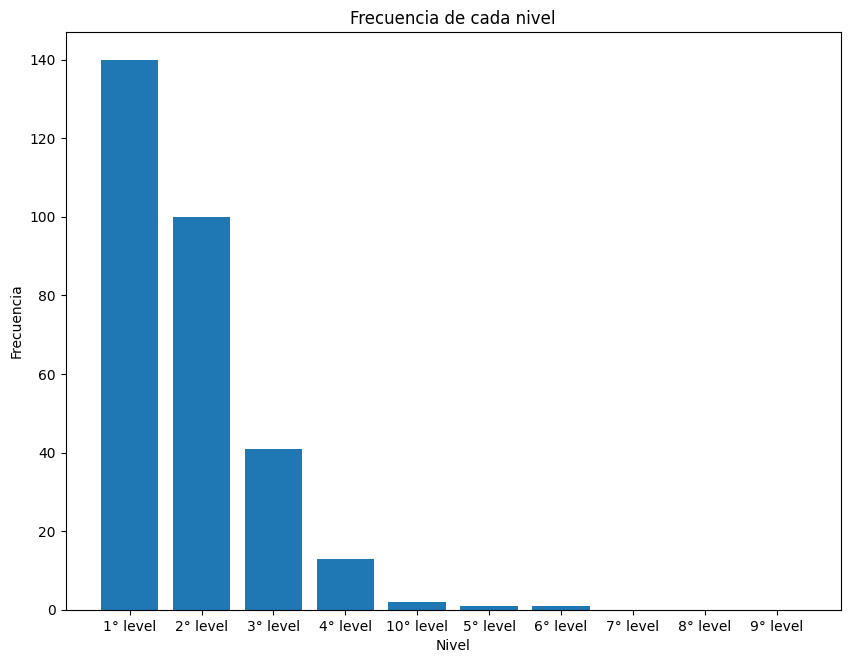

In [40]:
frecuencias = df_forbes['Sallary based levels'].value_counts()

plt.figure(figsize=(10, 7.5))
# Crear un gráfico de barras de las frecuencias
plt.bar(frecuencias.index, frecuencias.values)

# Añadir etiquetas a los ejes y título al gráfico
plt.xlabel('Nivel')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cada nivel')

plt.show()

Como es de esperar, los niveles mas bajos cuentan con mayor cantidad de deportistas que los niveles superiores, mientras que los niveles 7, 8 y 9 no cuentan con elementos asociados a ellos, comprobado con las siguientes operaciones que lo confirman:

In [51]:
df_forbes[df_forbes['Sallary based levels']=='7° level'].count()

S.NO                    0
Name                    0
Nationality             0
Current Rank            0
Previous Year Rank      0
Sport                   0
Year                    0
earnings ($ million)    0
Sallary based levels    0
dtype: int64

In [50]:
df_forbes[df_forbes['Sallary based levels']=='8° level'].count()

S.NO                    0
Name                    0
Nationality             0
Current Rank            0
Previous Year Rank      0
Sport                   0
Year                    0
earnings ($ million)    0
Sallary based levels    0
dtype: int64

In [52]:
df_forbes[df_forbes['Sallary based levels']=='9° level'].count()

S.NO                    0
Name                    0
Nationality             0
Current Rank            0
Previous Year Rank      0
Sport                   0
Year                    0
earnings ($ million)    0
Sallary based levels    0
dtype: int64

#6 Preguntas

##a) ¿Quién es la persona que más dinero ganó en un año?

Usando la clasificación hecha en la pregunta 5, se puede ver que el unico atleta en el nivel 10 (el más alto) es **Floyd Mayweather**.

##b) ¿Cuál es el deporte que más se repite dentro de la lista?

Basado en el desarrollo 3.c), se extrae que el deporte que mas aparece es el **Basquetball** con una frecuencia absoluta de 0.179402, con lo cual toma el lugar del deporte mas repetido con un $17,94\%$ de las apariciones.

##c) ¿Cuál es el deporte donde más dinero se gana?

La respuesta que se puede entregar es en base al ranking entregado, el cual solo contiene los deportistas mejor pagados de cada año, no con los sueldos de todos los deportistas, por lo que con base en el desarrollo 4.c), se concluye que es el **basketball** con **USD$\$3418.1$ millones**.